In [39]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
from tensorflow.keras import layers

# 創建時間序列資料
#tran_data = [2, 7, 9, 11, 17, 21, 15, 2, 10, 9, 15, 20, 16, 12, 9, 7, 15, 9, 9, 16]
# 讀取Excel文件中的數據
df = pd.read_excel("data.xlsx", sheet_name="tran_data")

# 將數據轉換為Numpy數組
tran_data = df["Column_Name"].values  # 將 "Column_Name" 替換為包含數據的列名

# 將資料轉換為Numpy數組
tran_data = np.array(tran_data, dtype=float)

# 分割數據為輸入和目標
sequence_length = 10  # 每個輸入序列的長度
X = []
y = []

for i in range(len(tran_data) - sequence_length):
    X.append(tran_data[i:i+sequence_length])
    y.append(tran_data[i+sequence_length])

X = np.array(X)
y = np.array(y)

# 正規化數據（可選）
# X = (X - np.min(X)) / (np.max(X) - np.min(X))
# y = (y - np.min(y)) / (np.max(y) - np.min(y))

# 創建RNN模型
model = keras.Sequential()
model.add(layers.SimpleRNN(50, activation='relu', input_shape=(sequence_length, 1)))
model.add(layers.Dense(1))

# 編譯模型
model.compile(optimizer='adam', loss='mean_squared_error')

# 訓練模型
model.fit(X, y, epochs=100, batch_size=4)

# 使用模型預測下一個值
last_sequence = np.array(tran_data[-sequence_length:]).reshape(1, sequence_length, 1)
predicted_value = model.predict(last_sequence)
print("預測的下一個值為:", predicted_value[0][0])


# 保存模型權重
model.save("time_series_model.h5")

Epoch 1/100
17/17 [==============================] - 1s 2ms/step - loss: 95.1729
Epoch 2/100
17/17 [==============================] - 0s 1ms/step - loss: 32.7993
Epoch 3/100
17/17 [==============================] - 0s 2ms/step - loss: 30.9150
Epoch 4/100
17/17 [==============================] - 0s 2ms/step - loss: 28.3053
Epoch 5/100
17/17 [==============================] - 0s 2ms/step - loss: 28.0972
Epoch 6/100
17/17 [==============================] - 0s 1ms/step - loss: 26.9676
Epoch 7/100
17/17 [==============================] - 0s 2ms/step - loss: 25.4858
Epoch 8/100
17/17 [==============================] - 0s 2ms/step - loss: 25.7905
Epoch 9/100
17/17 [==============================] - 0s 1ms/step - loss: 24.0903
Epoch 10/100
17/17 [==============================] - 0s 2ms/step - loss: 23.2343
Epoch 11/100
17/17 [==============================] - 0s 3ms/step - loss: 22.5233
Epoch 12/100
17/17 [==============================] - 0s 2ms/step - loss: 21.0271
Epoch 13/100
17/17 [=====

In [18]:
## 持續訓練該模型
# 載入模型權重
model.load_weights("time_series_model.h5")

# 讀取Excel文件中的數據
df = pd.read_excel("data.xlsx", sheet_name="tran_data")

# 將數據轉換為Numpy數組
tran_data = df["Column_Name"].values  # 將 "Column_Name" 替換為包含數據的列名

# 將資料轉換為Numpy數組
tran_data = np.array(tran_data, dtype=float)

# 分割數據為輸入和目標
sequence_length = 10  # 每個輸入序列的長度
X = []
y = []

for i in range(len(tran_data) - sequence_length):
    X.append(tran_data[i:i+sequence_length])
    y.append(tran_data[i+sequence_length])

X = np.array(X)
y = np.array(y)

# 繼續訓練模型
model.fit(X, y, epochs=200, batch_size=4)

Epoch 1/200
15/15 [==============================] - 0s 2ms/step - loss: 0.9731
Epoch 2/200
15/15 [==============================] - 0s 2ms/step - loss: 0.8960
Epoch 3/200
15/15 [==============================] - 0s 2ms/step - loss: 0.8515
Epoch 4/200
15/15 [==============================] - 0s 3ms/step - loss: 1.0283
Epoch 5/200
15/15 [==============================] - 0s 2ms/step - loss: 1.0219
Epoch 6/200
15/15 [==============================] - 0s 2ms/step - loss: 0.8197
Epoch 7/200
15/15 [==============================] - 0s 2ms/step - loss: 0.7888
Epoch 8/200
15/15 [==============================] - 0s 3ms/step - loss: 0.5578
Epoch 9/200
15/15 [==============================] - 0s 2ms/step - loss: 0.4985
Epoch 10/200
15/15 [==============================] - 0s 2ms/step - loss: 0.4707
Epoch 11/200
15/15 [==============================] - 0s 2ms/step - loss: 0.3072
Epoch 12/200
15/15 [==============================] - 0s 2ms/step - loss: 0.3536
Epoch 13/200
15/15 [=================

In [38]:
# 載入模型權重
model.load_weights("time_series_model.h5")

input_data = np.array([17,11,9,7,12,8,14,9])

# 將 input_data 補齊為長度為10的序列
if len(input_data) < 10:
    input_data = np.concatenate(([0] * (10 - len(input_data)), input_data), axis=0)

# 將 input_data 轉換為二維格式
input_data = input_data.reshape(1, 10, 1)

# 使用模型預測下一筆資料
predicted_value = model.predict(input_data)

print("預測的下一筆資料為:", predicted_value[0][0])

1/1 [==============================] - 0s 22ms/step
預測的下一筆資料為: 6.2168293


Epoch 1/200
13/13 [==============================] - 1s 3ms/step - loss: 195.9503
Epoch 2/200
13/13 [==============================] - 0s 3ms/step - loss: 132.3838
Epoch 3/200
13/13 [==============================] - 0s 3ms/step - loss: 38.4718
Epoch 4/200
13/13 [==============================] - 0s 3ms/step - loss: 32.1794
Epoch 5/200
13/13 [==============================] - 0s 3ms/step - loss: 32.6117
Epoch 6/200
13/13 [==============================] - 0s 4ms/step - loss: 29.5622
Epoch 7/200
13/13 [==============================] - 0s 2ms/step - loss: 29.8386
Epoch 8/200
13/13 [==============================] - 0s 3ms/step - loss: 30.5537
Epoch 9/200
13/13 [==============================] - 0s 2ms/step - loss: 32.2628
Epoch 10/200
13/13 [==============================] - 0s 3ms/step - loss: 29.3169
Epoch 11/200
13/13 [==============================] - 0s 3ms/step - loss: 29.0329
Epoch 12/200
13/13 [==============================] - 0s 2ms/step - loss: 29.1263
Epoch 13/200
13/13 [===

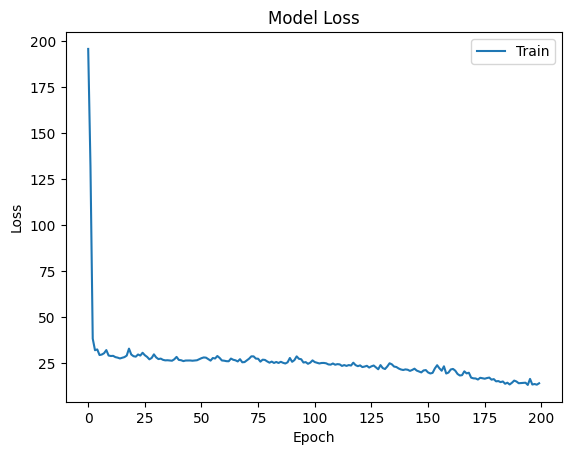

1/1 [==============================] - 0s 132ms/step
預測的下一個值為: 19.471283


In [7]:
##LSTM
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# 創建時間序列資料
#tran_data = [2, 7, 9, 11, 17, 21, 15, 2, 10, 9, 15, 20, 16, 12, 9, 7, 15, 9, 9, 16]
# 讀取Excel文件中的數據
df = pd.read_excel("20231031_tran_data.xlsx", sheet_name="tran_data")

# 將數據轉換為Numpy數組
tran_data = df["Column_Name"].values  # 將 "Column_Name" 替換為包含數據的列名

# 將資料轉換為Numpy數組
tran_data = np.array(tran_data, dtype=float)

# 分割數據為輸入和目標
sequence_length = 10  # 每個輸入序列的長度
X = []
y = []

for i in range(len(tran_data) - sequence_length):
    X.append(tran_data[i:i+sequence_length])
    y.append(tran_data[i+sequence_length])

X = np.array(X)
y = np.array(y)

# 正規化數據（可選）
# X = (X - np.min(X)) / (np.max(X) - np.min(X))
# y = (y - np.min(y)) / (np.max(y) - np.min(y))

# 創建LSTM模型
model = keras.Sequential()
model.add(layers.LSTM(50, activation='relu', input_shape=(sequence_length, 1), return_sequences=True))
model.add(layers.LSTM(25, activation='relu', input_shape=(sequence_length, 1),return_sequences=False))
model.add(Dropout(0.1))
model.add(layers.Dense(1))

# 編譯模型
model.compile(optimizer='adam', loss='mean_squared_error')

# 訓練模型
history = model.fit(X, y, epochs=200, batch_size=16)

# 繪製訓練過程的損失函數收斂曲線
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper right')
plt.show()

# 使用模型預測下一個值
last_sequence = np.array(tran_data[-sequence_length:]).reshape(1, sequence_length, 1)
predicted_value = model.predict(last_sequence)
print("預測的下一個值為:", predicted_value[0][0])

# 保存模型權重
model.save("time_series_LSTM_model.h5")

In [ ]:
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor

# 定義建立模型的函數
def create_model(units=50, learning_rate=0.001, batch_size=4, epochs=100):
    # model = keras.Sequential()
    # model.add(layers.LSTM(units, activation='relu', input_shape=(sequence_length, 1)))
    # model.add(layers.Dense(1))
    # model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate), loss='mean_squared_error')
    # 讀取Excel文件中的數據
    df = pd.read_excel("20231031_tran_data.xlsx", sheet_name="tran_data")
    # 將數據轉換為Numpy數組
    tran_data = df["Column_Name"].values  # 將 "Column_Name" 替換為包含數據的列名

    # 將資料轉換為Numpy數組
    tran_data = np.array(tran_data, dtype=float)

    # 分割數據為輸入和目標
    sequence_length = 10  # 每個輸入序列的長度
    X = []
    y = []

    for i in range(len(tran_data) - sequence_length):
        X.append(tran_data[i:i+sequence_length])
        y.append(tran_data[i+sequence_length])

    X = np.array(X)
    y = np.array(y)

    # 正規化數據（可選）
    # X = (X - np.min(X)) / (np.max(X) - np.min(X))
    # y = (y - np.min(y)) / (np.max(y) - np.min(y))

    # 創建LSTM模型
    model = keras.Sequential()
    model.add(layers.LSTM(50, activation='relu', input_shape=(sequence_length, 1)))
    model.add(layers.Dense(1))

    # 編譯模型
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# 使用KerasRegressor包裝模型，以便於GridSearchCV使用
model = KerasRegressor(build_fn=create_model, verbose=0)

# 定義要調整的超參數範圍
param_grid = {
    'units': [50, 100, 150,200],
    'learning_rate': [0.001, 0.01, 0.1,0.2,0.02,0.5,0.05],
    'batch_size': [4, 8, 16, 20],
    'epochs': [50, 100, 200, 150]
}

# 使用網格搜索來找到最佳超參數組合
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=3)
grid_result = grid.fit(X, y)

# 輸出最佳超參數組合和最佳評分
print("最佳超參數組合: ", grid_result.best_params_)
print("最佳評分: ", -grid_result.best_score_)

In [1]:
##LSTM 預測二元分類
import numpy as np
import pandas as pd

# tran_data = ['S', 'S', 'B', 'S', 'B', 'S', 'B', 'B', 'B', 'S', 'S', 'B', 'S', 'B', 'S', 'B', 'B', 'B', 'S']
# tran_data_numeric = [0 if x == 'S' else 1 for x in tran_data]

# 讀取Excel文件中的數據
df = pd.read_excel("20231101_lucky_number.xlsx", sheet_name="tran_data")

# 將數據轉換為Numpy數組
tran_data = df["Column_Name"].values  # 將 "Column_Name" 替換為包含數據的列名

tran_data_numeric = [0 if x == 'S' else 1 for x in tran_data]



In [2]:
sequence_length = 10
X = []
y = []

for i in range(len(tran_data_numeric) - sequence_length):
    X.append(tran_data_numeric[i:i+sequence_length])
    y.append(tran_data_numeric[i+sequence_length])

X = np.array(X)
y = np.array(y)


Epoch 1/460
29/29 [==============================] - 3s 9ms/step - loss: 0.6934 - accuracy: 0.4945
Epoch 2/460
29/29 [==============================] - 0s 10ms/step - loss: 0.6933 - accuracy: 0.5100
Epoch 3/460
29/29 [==============================] - 0s 11ms/step - loss: 0.6933 - accuracy: 0.5100
Epoch 4/460
29/29 [==============================] - 0s 11ms/step - loss: 0.6931 - accuracy: 0.5100
Epoch 5/460
29/29 [==============================] - 0s 12ms/step - loss: 0.6931 - accuracy: 0.5100
Epoch 6/460
29/29 [==============================] - 0s 11ms/step - loss: 0.6931 - accuracy: 0.5100
Epoch 7/460
29/29 [==============================] - 0s 12ms/step - loss: 0.6931 - accuracy: 0.5100
Epoch 8/460
29/29 [==============================] - 0s 11ms/step - loss: 0.6932 - accuracy: 0.5100
Epoch 9/460
29/29 [==============================] - 0s 13ms/step - loss: 0.6930 - accuracy: 0.5100
Epoch 10/460
29/29 [==============================] - 0s 12ms/step - loss: 0.6930 - accuracy: 0.5100


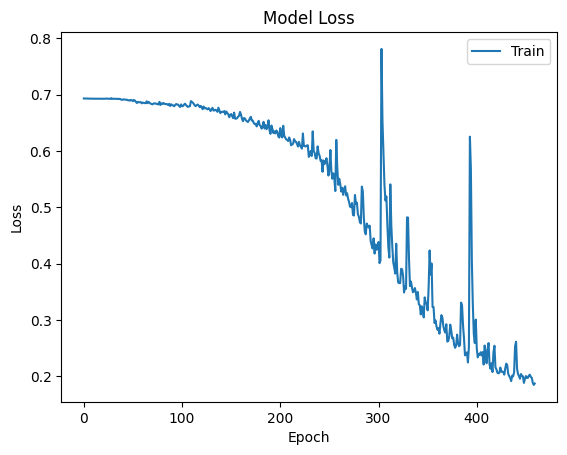

C:\Users\wratt\AppData\Roaming\Python\Python310\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np  # 確保已導入 NumPy
import matplotlib.pyplot as plt

model = keras.Sequential()
model.add(layers.LSTM(100, activation='relu', input_shape=(sequence_length, 1),return_sequences=True))
model.add(layers.LSTM(80, activation='relu', input_shape=(sequence_length, 1),return_sequences=True))
model.add(layers.LSTM(50, activation='relu', input_shape=(sequence_length, 1),return_sequences=False))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history =model.fit(X, y, epochs=460, batch_size=16)
print("history",history)
# 繪製訓練過程的損失函數收斂曲線
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper right')
plt.show()


# 保存模型權重
model.save("lucky_number_LSTM_model.h5")

In [4]:
# 使用模型預測下一筆資料
last_sequence = np.array(tran_data_numeric[-sequence_length:]).reshape(1, sequence_length, 1)
predicted_value = model.predict(last_sequence)

predicted_class = "B" if predicted_value[0][0] > 0.5 else "S"
print("預測的下一筆資料為:", predicted_class)

1/1 [==============================] - 0s 312ms/step
預測的下一筆資料為: B


In [5]:
# 初始化一個空的預測序列
predicted_sequence = []

# 進行 5 次預測
for i in range(10):
    # 最後 sequence_length 筆資料的預測
    last_sequence = np.array(tran_data_numeric[-sequence_length:]).reshape(1, sequence_length, 1)
    predicted_value = model.predict(last_sequence)

    predicted_class = "B" if predicted_value[0][0] > 0.5 else "S"
    
    # 添加預測值到預測序列
    predicted_sequence.append(predicted_class)
    
    # 更新 tran_data_numeric，以便下一次預測
    tran_data_numeric.append(0 if predicted_class == 'S' else 1)

print("預測的下一 5 筆資料為:", predicted_sequence)

1/1 [==============================] - 0s 17ms/step
預測的下一 5 筆資料為: ['B', 'S', 'B', 'S', 'S', 'S', 'B', 'B', 'S', 'B']


In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
from tensorflow.keras import layers

In [11]:
# 使用模型预测接下来的 5 筆資料
predicted_sequence = []
test_data_numeric = ['S','B','S','S','S','B','S','B','S','B']


# 获取过去的 10 个时间步数据
past_data = test_data_numeric

# 将过去的数据转换为模型期望的输入格式
input_sequence = np.array([0 if x == 'S' else 1 for x in past_data]).reshape(1, 10, 1)

# 使用模型进行预测
predicted_value = model.predict(input_sequence)

predicted_class = "B" if predicted_value[0][0] > 0.5 else "S"

print("預測的下一筆資料為:", predicted_class)

1/1 [==============================] - 0s 18ms/step
預測的下一筆資料為: B
